In [1]:
import tensorflow
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.utils import shuffle
from collections import Counter
import string
#nltk.download('perluniprops')
from nltk.tokenize.moses import MosesDetokenizer
from collections import defaultdict
#from nltk

#from nltk.corpus import stopwords
%matplotlib inline

In [2]:
data = pd.DataFrame.from_csv('Reviews.csv')
data = data[0:200]

In [3]:
#getting filtered text and adding it to dataframe
#adding review length to dataframe
tokenizer = RegexpTokenizer(r'\w+')
stop_word = set(nltk.corpus.stopwords.words('english'))
detokenizer = MosesDetokenizer()
Filtered_text = []

for id in tqdm_notebook(data.index):
    Full_text = tokenizer.tokenize(data['Text'][id].lower())
    text_list = []
    for word in Full_text:
        if word not in stop_word:
            text_list.append(word)
    Filtered_text.append(detokenizer.detokenize(text_list, return_str=True))
    
data['Filtered_text'] = Filtered_text

#dictionary of number_of_reviews
review_length = []
for id in tqdm_notebook(data.index):
    review_length.append(len(data['Filtered_text'][id].split()))

data['review_length'] = review_length

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [4]:
#maximum and minimum review length

max_id, max_value = max(data['review_length'].items(), key = lambda p: p[1])
min_id, min_value = min(data['review_length'].items(), key = lambda p: p[1])

print('The maximum review length is ',max_value ,'and the corresponding id is ',max_id)
print('The minimum review length is ',min_value ,'and the corresponding id is ',min_id, 'with text - ', data['Filtered_text'][min_id])

The maximum review length is  228 and the corresponding id is  83
The minimum review length is  5 and the corresponding id is  75 with text -  okay would go way buy


In [5]:
#filtered dataframe
filtered_data = data.loc[data['review_length'] < 61]

Number of reviews per rating on the original dataFrame is,
 Counter({5: 137, 4: 26, 3: 18, 1: 12, 2: 7})
Number of reviews per rating on the Filtered dataFrame is,
 Counter({5: 118, 4: 23, 3: 17, 1: 11, 2: 6})


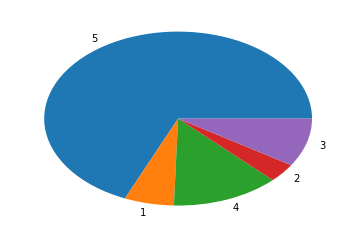

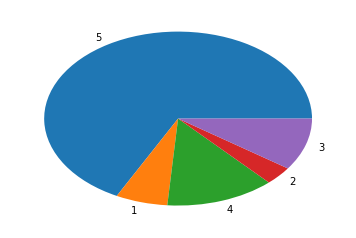

In [6]:
#pie plot after reduction
plt.figure(0)
percentage_reviews = Counter(data['Score'])
print("Number of reviews per rating on the original dataFrame is,\n",Counter(data['Score']))
plt.pie([float(percent) for percent in percentage_reviews.values()], labels=[int(review) for review in percentage_reviews]);

plt.figure(1)

filtered_percentage_reviews = Counter(filtered_data['Score'])
print("Number of reviews per rating on the Filtered dataFrame is,\n",Counter(filtered_data['Score']))
plt.pie([float(percent) for percent in filtered_percentage_reviews.values()], labels=[int(review) for review in filtered_percentage_reviews]);

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


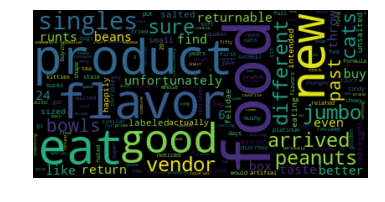

In [7]:
#create word dictionary in the filtered dataframe
freview_dict = defaultdict(int)
for review in tqdm_notebook(filtered_data['Filtered_text']):
    pool = review.split()
    for word in pool:
        freview_dict[word] += 1 

#word cloud for entire filtered data
word_cloud_freview = WordCloud().generate_from_frequencies(freview_dict)
plt.imshow(word_cloud_freview, interpolation = 'bilinear'); 
plt.axis("off");

#word cloud for review scores from 1 to 5
freview_dict_individual = defaultdict(lambda: defaultdict(int))
for iteration in tqdm_notebook(range(len(filtered_data))):
    pool = filtered_data['Filtered_text'][filtered_data.index[iteration]].split()
    for word in pool:
        freview_dict_individual[filtered_data['Score'][filtered_data.index[iteration]]][word] += 1 
        
word_cloud_freview = WordCloud().generate_from_frequencies(freview_dict_individual[1])
plt.imshow(word_cloud_freview, interpolation = 'bilinear'); 
plt.axis("off");
        


In [8]:
freview_sorted_list = np.array(sorted(freview_dict.items(), key = lambda x:x[1], reverse = True))
sorted_pool = [word for word in freview_sorted_list[0:50,0]]
sorted_pool.append('UNK')
sorted_pool_dict = dict(zip(sorted_pool,range(0,50)))

word_vector_list = []


for iteration in tqdm_notebook(range(len(filtered_data))):
    #word_vector_dict = defaultdict(int)
    word_list = []
    pool = filtered_data['Filtered_text'][filtered_data.index[iteration]].split()
    for word in pool:
        if word in sorted_pool:
            word_list.append(sorted_pool_dict[word])
    word_vector_list.append(word_list)


    
    

Widget Javascript not detected.  It may not be installed or enabled properly.


In [9]:
word_vector_list

[[31, 19, 1, 26, 2, 38, 5, 4, 12, 5, 12],
 [5, 5],
 [15],
 [26, 32, 2, 9],
 [3, 3, 11],
 [32, 44, 28, 14, 33, 20],
 [3, 28, 45, 34, 33, 45],
 [2, 28, 33],
 [13, 7],
 [19, 1, 2, 39, 2, 19, 46],
 [6, 1, 5, 1, 1, 10, 1],
 [32, 44, 1, 35, 1, 1, 36, 1, 13],
 [2, 9, 7],
 [],
 [10, 33],
 [7, 2, 4, 16],
 [],
 [45, 11, 24, 40],
 [31, 17, 24, 34],
 [31, 39, 0, 44, 34, 11, 17, 5, 29],
 [45, 38, 5],
 [7, 45, 37],
 [37, 0, 21],
 [5, 0, 0, 17, 5, 29],
 [45, 9, 33, 21],
 [17, 16, 0, 3, 11],
 [32, 15, 15, 6, 33, 15, 3, 13, 14, 13, 0],
 [22, 30, 22, 12, 6, 4, 22, 0, 30, 10, 2, 22, 33, 2, 11, 6],
 [3, 11, 3, 8, 17, 5, 0, 0],
 [2, 25, 18, 23, 18, 20, 15, 12, 15, 12, 3, 16, 47, 23, 15, 41, 2, 28],
 [25,
  18,
  47,
  25,
  18,
  9,
  2,
  16,
  47,
  41,
  16,
  23,
  25,
  20,
  25,
  0,
  0,
  47,
  25,
  18,
  29,
  41,
  15,
  29],
 [47, 25, 18, 29, 41, 15, 29, 0, 0, 47, 25, 27, 26, 3, 4, 1],
 [5, 12, 11, 1, 40, 7, 47, 25, 18, 28, 0, 0, 0],
 [18, 25, 40, 20, 18, 30, 12, 18],
 [22, 25, 18, 27, 26, 2, 2

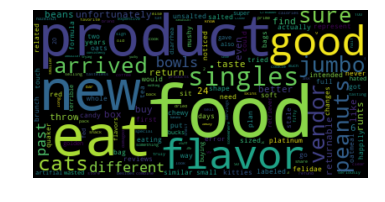

In [10]:
word_cloud_freview = WordCloud().generate_from_frequencies(freview_dict_individual[1])
plt.imshow(word_cloud_freview, interpolation = 'bilinear'); 
plt.axis("off");

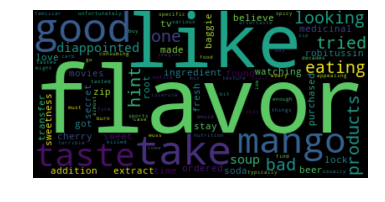

In [11]:
word_cloud_freview = WordCloud().generate_from_frequencies(freview_dict_individual[2])
plt.imshow(word_cloud_freview, interpolation = 'bilinear'); 
plt.axis("off");

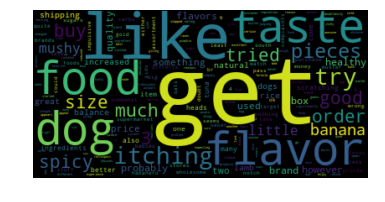

In [12]:
word_cloud_freview = WordCloud().generate_from_frequencies(freview_dict_individual[3])
plt.imshow(word_cloud_freview, interpolation = 'bilinear'); 
plt.axis("off");

In [13]:
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Filtered_text,review_length
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,23
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,18
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,40
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,18
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,13
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair taffy ordered five pound bag taf...,40
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,saltwater taffy great flavors soft chewy candy...,28
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,taffy good soft chewy flavors amazing would de...,11
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,right mostly sprouting cats eat grass love rot...,11


In [14]:
word_vector_dataframe

NameError: name 'word_vector_dataframe' is not defined

In [ ]:
plt.plot(freview_sorted_list[5:,1])